<a href="https://colab.research.google.com/github/obeabi/ProjectPortfolio/blob/master/Cat_Non_Cat_2LayerNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
## Image Classification using shallow and deep neural networks
### Date: 17-08-2020
#### Aim : Quantifying impact of activation function on Cat vs Non-Cat dataset

## Install libraries

In [1]:
# install packages
import time
import h5py
import numpy as np
import scipy
from PIL import  Image
import matplotlib.pyplot as plt
from dnn_app_utils_v3 import *
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)
print(" Packages installed succefully!")

 Packages installed succefully!


## Load Dataset: Cat vs Non-Cat Dataset

y = 0. It's a non-cat picture.


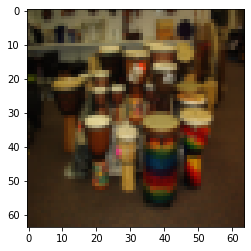

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Example of a pictures
index = 5
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")


y = 0. It's a non-cat picture.


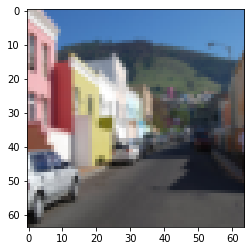

In [3]:
# Example of picture
index = 1
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

y = 1. It's a cat picture.


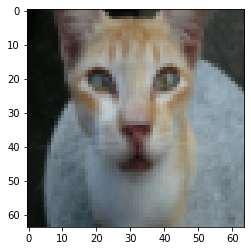

In [4]:
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
# Initial data exploration
print(train_x_orig.shape)
print(train_y.shape)
print(test_y.shape)
print(test_x_orig.shape)


(209, 64, 64, 3)
(1, 209)
(1, 50)
(50, 64, 64, 3)


In [6]:
# Explore your dataset clearly
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [7]:
# Reshape/flatten/unroll images
train_x_flatten = train_x_orig.reshape(m_train, -1).T
test_x_flatten = test_x_orig.reshape(m_test,-1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## Build 2 Layer Neural Network archeticture

In [8]:
# CONSTANTS DEFINING THE MODEL 
n_x = train_x.shape[0]     # num_px * num_px * 3 i.e. input features
n_h = 7                    # number of units in hidden layer 
n_y = 1                    # output layer
layers_dims = (n_x, n_h, n_y)
print(layers_dims)

(12288, 7, 1)


### Model 1: Relu activation in hidden layer with sigmoid activation in output layer

## Build and Train Model 1

In [9]:
# # CONSTANTS DEFINING THE MODEL 
n_x = train_x.shape[0]     # num_px * num_px * 3 i.e. input features
n_h = 7                    # number of units in hidden layer 
n_y = 1                    # output layer
layers_dims = (n_x, n_h, n_y)
print(layers_dims)

(12288, 7, 1)


In [10]:
# FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation= 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
    
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = 'relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.5158304772764731
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.35807050113237976
Cost after iteration 1000: 0.3394281538366413
Cost after iteration 1100: 0.30527536361962654
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.2468176821061484
Cost after iteration 1400: 0.19850735037466105
Cost after iteration 1500: 0.17448318112556638
Cost after iteration 1600: 0.17080762978096967
Cost after iteration 1700: 0.11306524562164705
Cost after iteration 1800: 0.09629426845937154
Cost after iteration 1900: 0.08342617959726867
Cost after iteration 2000: 0.07439078704319087
Cost after iteration 2100: 0.0663074

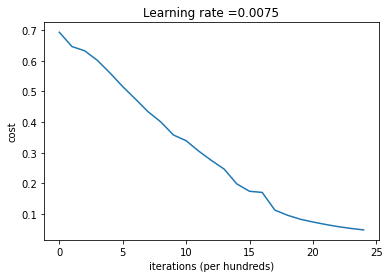

In [11]:
# Train Model 1
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [12]:
## Accuracy from training and test set for Model 1 (Relu)
print( " The training set accuracy is:")
predictions_train = predict(train_x, train_y, parameters)

print( " The test set accuracy is:")
predictions_test = predict(test_x, test_y, parameters)


 The training set accuracy is:
Accuracy: 0.9999999999999998
 The test set accuracy is:
Accuracy: 0.72


## Model 2: Tanh activation in hidden layer 

## Build and train Model 2

In [13]:
# # CONSTANTS DEFINING THE MODEL 
n_x = train_x.shape[0]     # num_px * num_px * 3 i.e. input features
n_h = 7                    # number of units in hidden layer 
n_y = 1                    # output layer
layers_dims = (n_x, n_h, n_y)
print(layers_dims)

(12288, 7, 1)


In [20]:
# FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = update_parameters(parameters, grads, learning_rate)
   
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> TANH -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        
        A1, cache1 = linear_activation_forward(X, W1, b1, activation= 'tanh')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
      
        
        # Compute cost
      
        cost = compute_cost(A2, Y)
      
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = 'tanh')
      
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        
        parameters = update_parameters(parameters, grads, learning_rate)
       
        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6908802414069743
Cost after iteration 100: 0.6510233532400127
Cost after iteration 200: 0.6449164881815148
Cost after iteration 300: 0.640390516665237
Cost after iteration 400: 0.6288357472499545
Cost after iteration 500: 0.6021953287674058
Cost after iteration 600: 0.5653233937144825
Cost after iteration 700: 0.5204773341661858
Cost after iteration 800: 0.47043972654924365
Cost after iteration 900: 0.4181463804382752
Cost after iteration 1000: 0.3671880501013116
Cost after iteration 1100: 0.39440889331230855
Cost after iteration 1200: 0.34735242968412733
Cost after iteration 1300: 0.31075145896371725
Cost after iteration 1400: 0.27709993936153227
Cost after iteration 1500: 0.20881874992311988
Cost after iteration 1600: 0.1870705924060077
Cost after iteration 1700: 0.16476737882601733
Cost after iteration 1800: 0.15594629380645178
Cost after iteration 1900: 0.16798123650179625
Cost after iteration 2000: 0.12722381668193405
Cost after iteration 2100: 0.10223043

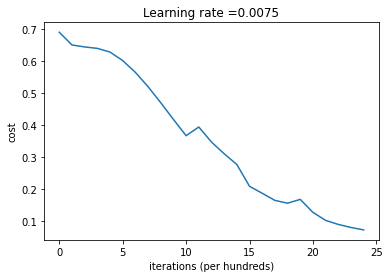

In [17]:
# Train Model 2
parameters_2 = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [18]:
## Accuracy from training and test set for Model 2 (TANH)
print( " The training set accuracy is:")
predictions_train2 = predict(train_x, train_y, parameters_2)

print( " The test set accuracy is:")
predictions_test2 = predict(test_x, test_y, parameters_2)

 The training set accuracy is:
Accuracy: 0.9856459330143538
 The test set accuracy is:
Accuracy: 0.68


## Model 3 : Leaky_relu in hidden layer

### Build and train Model 3

In [21]:
# # CONSTANTS DEFINING THE MODEL 
n_x = train_x.shape[0]     # num_px * num_px * 3 i.e. input features
n_h = 7                    # number of units in hidden layer 
n_y = 1                    # output layer
layers_dims = (n_x, n_h, n_y)
print(layers_dims)

(12288, 7, 1)


In [22]:
# FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
  
    parameters = initialize_parameters(n_x, n_h, n_y)  
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> Leaky RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        
        A1, cache1 = linear_activation_forward(X, W1, b1, activation= 'leaky_relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
      
        
        # Compute cost
      
        cost = compute_cost(A2, Y)
      
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = 'leaky_relu')
      
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        
        parameters = update_parameters(parameters, grads, learning_rate)
       
        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6930240089739587
Cost after iteration 100: 0.646263713987814
Cost after iteration 200: 0.6323362158852344
Cost after iteration 300: 0.6009075872994085
Cost after iteration 400: 0.5578972038222232
Cost after iteration 500: 0.5054777241838477
Cost after iteration 600: 0.4452847415090626
Cost after iteration 700: 0.38805894114062844
Cost after iteration 800: 0.3798550568284945
Cost after iteration 900: 0.3547996818003537
Cost after iteration 1000: 0.3197963655967548
Cost after iteration 1100: 0.2850090838999435
Cost after iteration 1200: 0.23934726400911358
Cost after iteration 1300: 0.18672861040183059
Cost after iteration 1400: 0.15563329741363602
Cost after iteration 1500: 0.6368845962482954
Cost after iteration 1600: 0.11885427396400779
Cost after iteration 1700: 0.10546491156970793
Cost after iteration 1800: 0.09136676195168981
Cost after iteration 1900: 0.07998663651502753
Cost after iteration 2000: 0.0704889261496029
Cost after iteration 2100: 0.0628977930

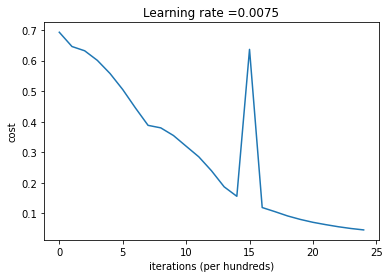

In [24]:
# Train Model 3
parameters_3 = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [25]:
## Accuracy from training and test set for Model 3 (leaky relu)
print( " The training set accuracy is:")
predictions_train3 = predict(train_x, train_y, parameters_3)

print( " The test set accuracy is:")
predictions_test3 = predict(test_x, test_y, parameters_3)

 The training set accuracy is:
Accuracy: 0.9808612440191385
 The test set accuracy is:
Accuracy: 0.7000000000000001


### Model 1 (RELU Activation) in hidden layer returns the highest accuracy at 72%, then Model 3 (Leaky Relu activation) with an accuracy of 70% and Model 3 (tanh activation) reported the least accuracy at 68%